In [5]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
#Importing the data file
df = pd.read_csv('movies.csv')

In [7]:
#Top 5 rows of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
#The data includes 15 features and 7668 observation
df.shape

(7668, 15)

In [9]:
# Displaying data-related information
#We can see that there are null values in different columns and unsuitable data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
#Sum of missing values in every columns

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
#filling the null values for the budget with mean of thebudget for every genre
mean_budget_per_genre=df.groupby('genre')['budget'].mean()#mean buget 
mean_budget_per_genre

genre
Action       5.808460e+07
Adventure    4.570839e+07
Animation    7.578520e+07
Biography    2.531232e+07
Comedy       2.260780e+07
Crime        2.236357e+07
Drama        2.291461e+07
Family       5.112500e+07
Fantasy      1.688571e+07
History      3.235620e+05
Horror       1.282516e+07
Music                 NaN
Musical               NaN
Mystery      3.187647e+07
Romance      2.404000e+07
Sci-Fi       1.973375e+07
Sport                 NaN
Thriller     1.051111e+07
Western      1.050000e+07
Name: budget, dtype: float64

In [12]:
#fillin the missing values in the budget column 

df['budget'] = df.groupby('genre').budget.apply(lambda x: x.fillna(x.mean()))
movie=df
movie

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,2.260780e+07,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,1.500000e+04,NaN,NaN,120.0


In [13]:
#dropping the null values for the rest of columns
movie=movie.dropna()

In [14]:
#Data shape after dropping the null values

movie.shape

(7409, 15)

In [15]:
#Data type of each columns

movie.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
#changing some columns types

movie['votes']= movie.votes.astype('int64')
movie['budget']= movie.budget.astype('int64')
movie['gross']= movie.gross.astype('int64')
movie.dtypes

<ipython-input-16-1164990fc041>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['votes']= movie.votes.astype('int64')
<ipython-input-16-1164990fc041>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['budget']= movie.budget.astype('int64')
<ipython-input-16-1164990fc041>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [17]:
#changing some columns names for more understandable names

movie.rename(columns={'name': 'movie_name', 'score': 'imdb_score', 'votes':'imdb_votes',
 'star': 'main_star', 'released': 'realsing_date', 'gross': 'profits','company': 'prod_company'}, inplace=True)

C:\Users\halah\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
#Display the columns names after the update

movie.columns

Index(['movie_name', 'rating', 'genre', 'year', 'realsing_date', 'imdb_score',
       'imdb_votes', 'director', 'writer', 'main_star', 'country', 'budget',
       'profits', 'prod_company', 'runtime'],
      dtype='object')

In [19]:
#Spliting the releasing_date column into two columns: 1-releasing _date 2-releasing_country

movie[['releasing_date','releasing_country']] = movie.realsing_date.str.split("(",expand=True)


C:\Users\halah\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
#dropping realsing_date because we split it into two columns 
#also dropping year because the year will be in the releasing_date column

movie.drop('realsing_date', axis=1,inplace=True )
movie.drop('year', axis=1, inplace=True )


C:\Users\halah\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
# removing the ')' from the realesing_country column

movie['releasing_country']=movie.releasing_country.str.replace(')', '')

<ipython-input-21-3849c4a3459f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie['releasing_country']=movie.releasing_country.str.replace(')', '')
<ipython-input-21-3849c4a3459f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['releasing_country']=movie.releasing_country.str.replace(')', '')


In [22]:
#changing the date type for releasing_date column to datetime 

movie['releasing_date']=pd.to_datetime(movie['releasing_date'])

<ipython-input-22-44d56a4f102e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['releasing_date']=pd.to_datetime(movie['releasing_date'])


In [23]:
#Dataset information after cleaning

movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7409 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_name         7409 non-null   object        
 1   rating             7409 non-null   object        
 2   genre              7409 non-null   object        
 3   imdb_score         7409 non-null   float64       
 4   imdb_votes         7409 non-null   int64         
 5   director           7409 non-null   object        
 6   writer             7409 non-null   object        
 7   main_star          7409 non-null   object        
 8   country            7409 non-null   object        
 9   budget             7409 non-null   int64         
 10  profits            7409 non-null   int64         
 11  prod_company       7409 non-null   object        
 12  runtime            7409 non-null   float64       
 13  releasing_date     7409 non-null   datetime64[ns]
 14  releasin

In [24]:
#Top 5 rows after cleaning the dataset

movie.head()

,movie_name,rating,genre,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime,releasing_date,releasing_country
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


# EDA
In this part, I will explore the dataset to check the following assumptions:

1-Most of the movies under the fantasy genre.

2-The action genre is the most profitable.

3-Main Stars and directors with more movies have the highest profits. 

4-Marvel production company is the most profitable.

5-Movie number and profits are increasing with time.

6-Movies in December has the highest profits compared to other months.
 

In [25]:
#Showing the top10 movies with the highest profits from 1980 -2020 

sorted_movies_10=movie.sort_values(by=['profits'], inplace=False, ascending=False)# Sorting all the movies by the highest profits
sorted_movies_10=sorted_movies_10.head(10)#Only getting the top10 movies
sorted_movies_10

,movie_name,rating,genre,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime,releasing_date,releasing_country
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States
7480,The Lion King,PG,Animation,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019-07-19,United States
6653,Jurassic World,PG-13,Action,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015-06-12,United States
6043,The Avengers,PG-13,Action,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012-05-04,United States
6646,Furious 7,PG-13,Action,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015-04-03,United States
7494,Frozen II,PG,Animation,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019-11-22,United States


We can see that the most genre here is the action genre, and we should note that superhero movies are considered action movies in this dataset. 

Text(63.0, 0.5, 'Movie Main Stars')

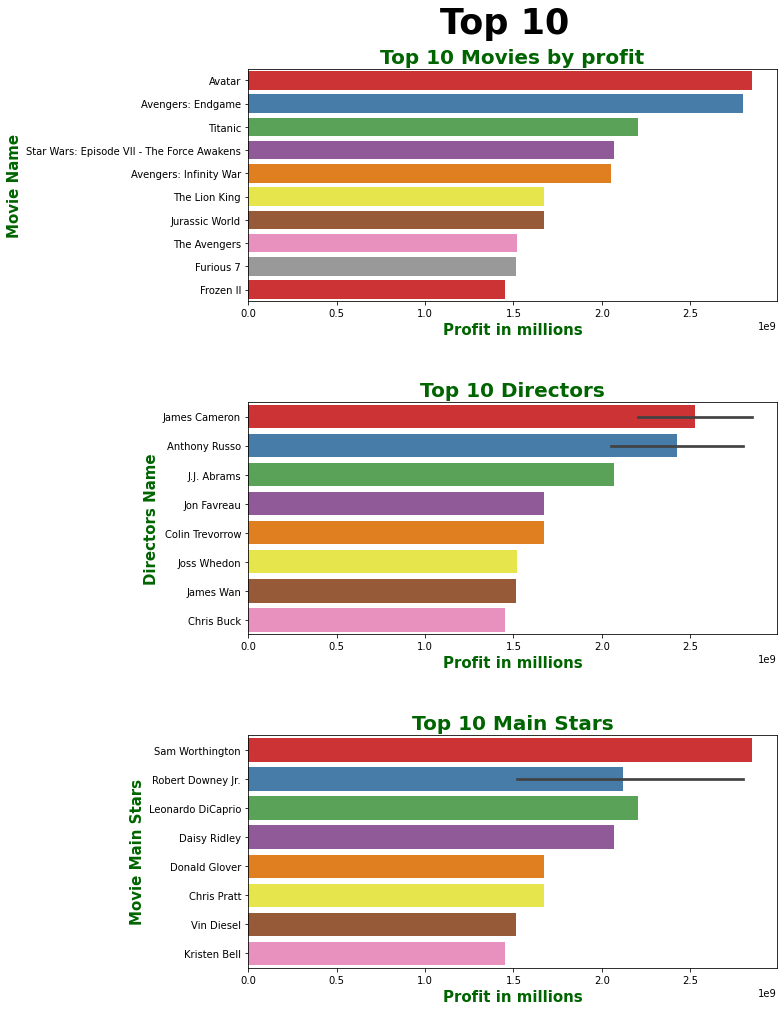

In [26]:
#plotting the profits, dirctors, main star feature.

fig, axs= plt.subplots(3,1 , figsize=(10, 15))# choosing the figure size
fig.tight_layout(pad=8)# make some space between the plots

fig.suptitle('Top 10',fontsize=35,weight='bold', color='black')# Title of the plot
top_movies=sns.barplot( y ='movie_name', x='profits', palette='Set1',data=sorted_movies_10, ax=axs[0])#choosing the axis of th plot
axs[0].set_title('Top 10 Movies by profit',fontsize=20,weight='bold', color='darkgreen')#Title for the first plot
axs[0].set_xlabel('Profit in millions', fontsize=15, weight='bold', color='darkgreen')#X label name
axs[0].set_ylabel('Movie Name', fontsize=15, weight='bold', color='darkgreen')#Y label name

top_director=sns.barplot( y ='director', x='profits', palette='Set1',data=sorted_movies_10, ax=axs[1])#choosing the axis of th plot
axs[1].set_title('Top 10 Directors',fontsize=20,weight='bold', color='darkgreen')#Title for the sceond plot
axs[1].set_xlabel('Profit in millions', fontsize=15, weight='bold', color='darkgreen')#X label name
axs[1].set_ylabel('Directors Name', fontsize=15, weight='bold', color='darkgreen')#Y label name


top_main_star=sns.barplot( y='main_star', x='profits', palette='Set1',data=sorted_movies_10, ax=axs[2])#choosing the axis of th plot
axs[2].set_title('Top 10 Main Stars',fontsize=20,weight='bold', color='darkgreen')#Title for the third plot
axs[2].set_xlabel('Profit in millions', fontsize=15, weight='bold', color='darkgreen')#X label name
axs[2].set_ylabel('Movie Main Stars', fontsize=15, weight='bold', color='darkgreen')#Y label name

We can see in the main star and the director plot that we have 8 bars in each, because we have three movies done by the same main star [Robert Downey Jr] and two movies were directed by the same director [James Cameron].

In [27]:
#Statics view for the numerical features

movie.describe()

,imdb_score,imdb_votes,budget,profits,runtime
count,7409.000000,7.409000e+03,7.409000e+03,7.409000e+03,7409.000000
mean,6.396666,9.079857e+04,3.429810e+07,7.902508e+07,107.440545
std,0.963136,1.653709e+05,3.647994e+07,1.662427e+08,18.511985
min,1.900000,1.050000e+02,6.000000e+03,3.090000e+02,63.000000
25%,5.800000,1.000000e+04,1.300000e+07,4.636169e+06,95.000000
50%,6.500000,3.400000e+04,2.291461e+07,2.042113e+07,104.000000
75%,7.100000,9.600000e+04,4.000000e+07,7.647105e+07,116.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


From the statics above we can see that:

1- The highest profit for a movie is 2847246000 and the lowest is 309.

2- The maximum IMDb score is 9.30 and the minimum is 1.90.

3- The maximum IMDb vote is 2400000 voters and the minimum is 105.

4- The highest budget was 356000000 and the lowest was 6000

5- The longest runtime was 366 min and the shortest was 61min.

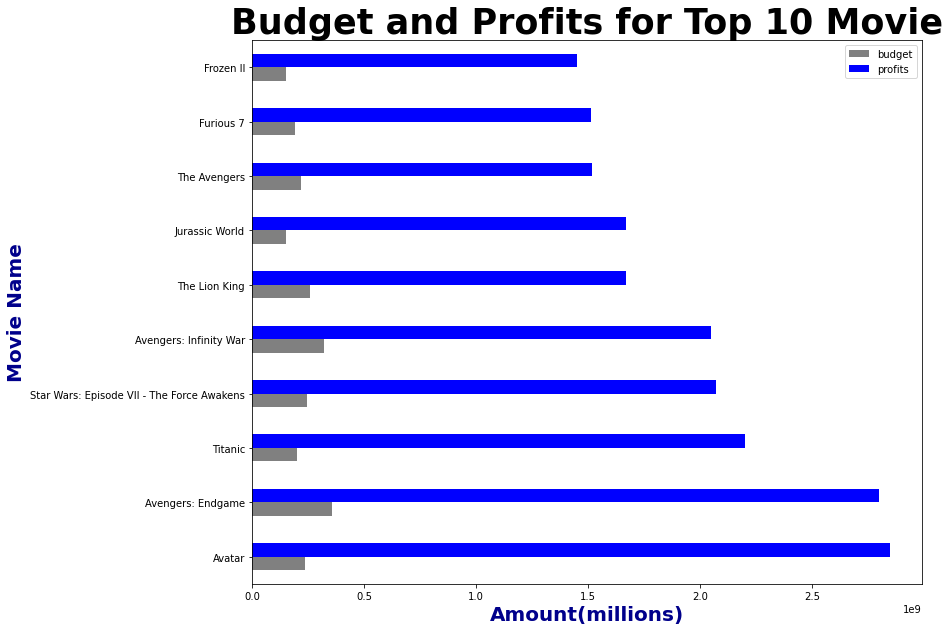

In [28]:
#Budget and profits for the Top 10 Movies.
sorted_movies_10.plot(kind='barh', x='movie_name', y=['budget','profits'], color={'budget':'grey', 'profits':'blue'}, figsize=(12,10))
plt.title('Budget and Profits for Top 10 Movie',fontsize=35,weight='bold', color='black')
plt.xlabel('Amount(millions)', fontsize=20,weight='bold', color='darkblue')
plt.ylabel('Movie Name', fontsize=20,weight='bold', color='darkblue')
plt.show()

We can see that the profits for the top 2 movies are significantly higher compared to the other movies in the plot. 
Also, we can see that budget for the top10 movies doesn't have a significant difference.

Now, we will start to answer the assumptions:
1-Most of the movies under the fantasy genre.

In [63]:
movie['genre'].nunique()# Finding how many genres we have in the dataset

15

Text(0, 0.5, 'Number of Movies in this genre')

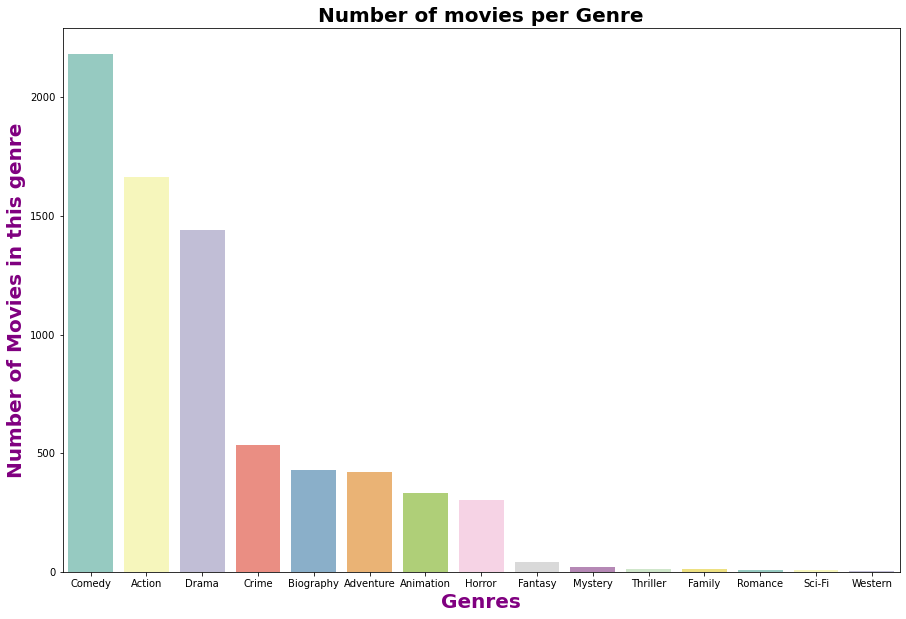

In [30]:
#ploting the number of movies per genre

plt.figure(figsize=[15, 10])#chooseing the figure size
count_genre=movie['genre'].value_counts().head(15).reset_index()#couting the nimber of movies for each genre
sns.barplot( x=count_genre.index, y=count_genre['genre'] , palette='Set3')#choosing the axies
plt.xticks(list(range(15)), count_genre['index'])#xlabel segments named as the genres
plt.title('Number of movies per Genre', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Genres', fontsize = 20,weight='bold', color='purple')#X label name
plt.ylabel('Number of Movies in this genre', fontsize = 20, weight='bold', color='purple')#Y label name

# We can see that the comedy genre is the most popular one, so we will find out if it's the most profitable one or not.

From the plot, we can see that the Comedy genre is the most popular and the assumption is wrong.

Now for the second assumption:
2-The action genre is the most profitable.


Text(0, 0.5, 'Sum of profits(Billions)')

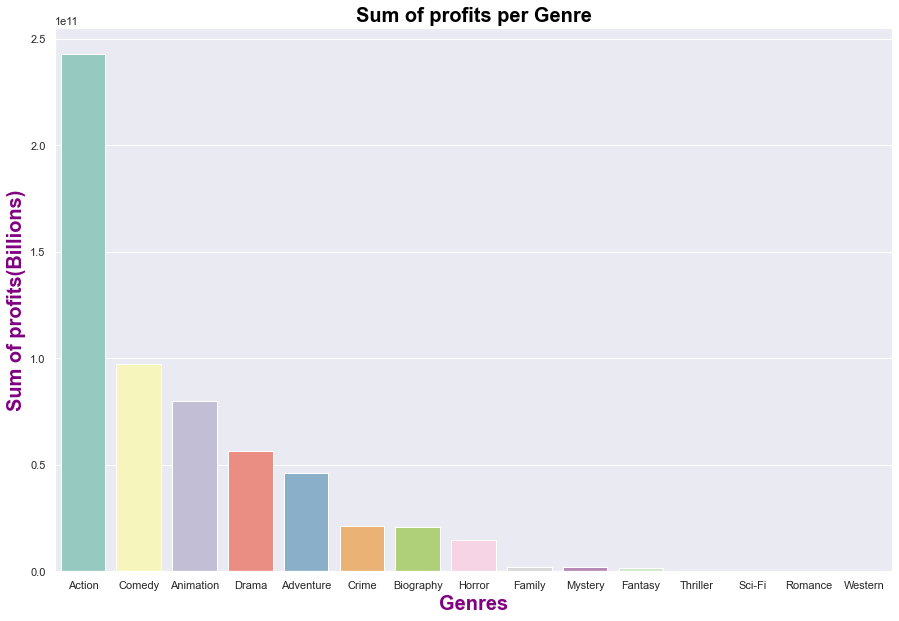

In [59]:
#plotting sum of the profits per genre

plt.figure(figsize=[15, 10])#figure size
sum_profit_per_genre=movie.groupby('genre').profits.sum().sort_values(ascending=False).head(15).reset_index()#Sum of the profits per genre
sns.barplot( x=sum_profit_per_genre['genre'], y=sum_profit_per_genre ['profits'], palette='Set3')#choosing the axis
plt.title('Sum of profits per Genre', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Genres', fontsize = 20,weight='bold', color='purple')#X label name
plt.ylabel('Sum of profits(Billions)', fontsize = 20, weight='bold', color='purple')# Yleabel name


From the plot, we can see that the action genre is the most profitable , so the assumption here is correct. 

Now for the third assumption:
3-Main Stars and directors with more movies have the highest profits. 


In [32]:
movie['main_star'].nunique() #finding how many stars we have in the dataset

2649

Text(0, 0.5, 'Number of Movies by Star')

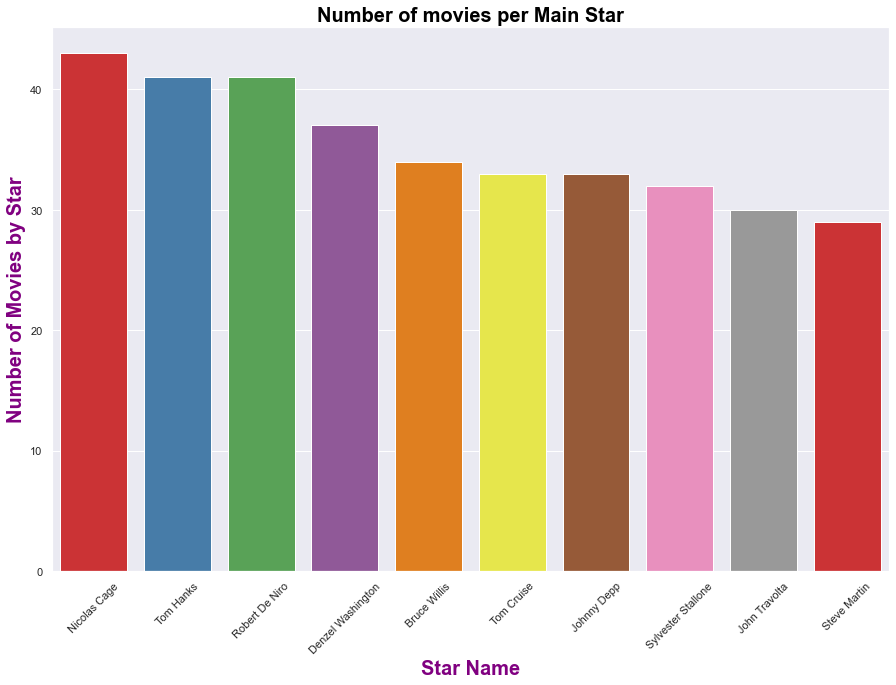

In [61]:
#number of movies per star and will display the top 10 because the dataset 1845 different star

plt.figure(figsize=[15, 10])#plot size
num_movie_per_main_actor=movie['main_star'].value_counts().sort_values(ascending=False).reset_index()#count number of movies per main star 
num_movie_per_main_actor=num_movie_per_main_actor.head(10)#choosing only the top10 
sns.barplot( x=num_movie_per_main_actor.index, y=num_movie_per_main_actor['main_star'] , palette='Set1')#choosing the axis
plt.xticks( rotation = 45)
plt.xticks(list(range(10)), num_movie_per_main_actor['index'])#Xlebel will be the the star's name
plt.title('Number of movies per Main Star', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Star Name', fontsize = 20,weight='bold', color='purple')# X label title
plt.ylabel('Number of Movies by Star', fontsize = 20, weight='bold', color='purple')#Y label title


Text(0, 0.5, 'Sum of profits(Billions)')

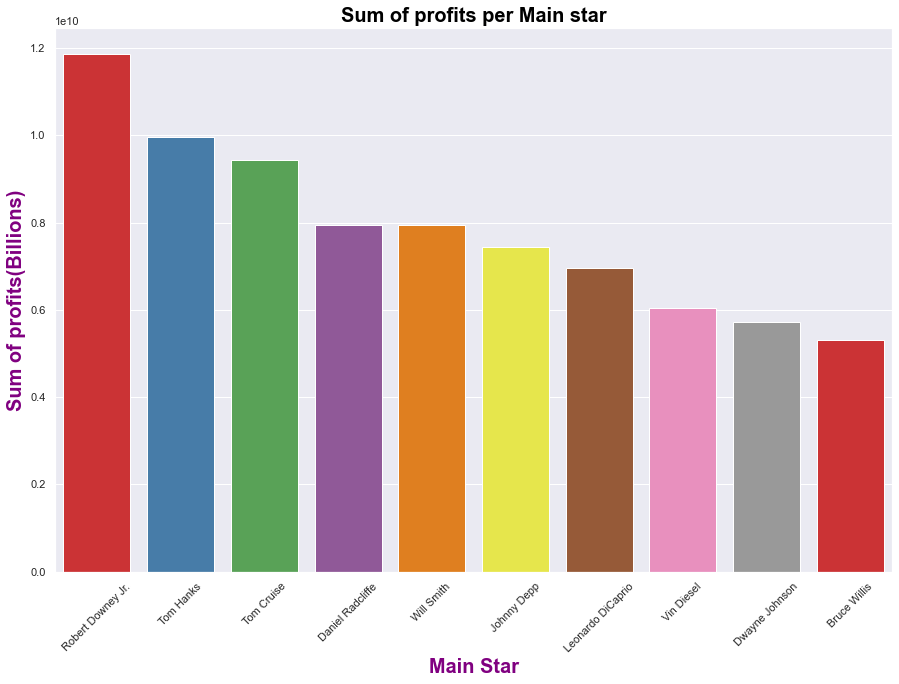

In [62]:
#sum of profits per star and we will display the top10

plt.figure(figsize=[15, 10])#Figure size
sum_profit_per_star=movie.groupby('main_star').profits.sum().sort_values(ascending=False).head(10).reset_index()#sum of the profits per star
sns.barplot( x=sum_profit_per_star['main_star'], y=sum_profit_per_star['profits'], palette='Set1')#choosing the axis
plt.xticks( rotation = 45)
plt.title('Sum of profits per Main star', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Main Star', fontsize = 20,weight='bold', color='purple')#X label title
plt.ylabel('Sum of profits(Billions)', fontsize = 20, weight='bold', color='purple')#Y lb=abel title


In [35]:
movie['director'].nunique() #finding how many directors we have in the dataset

2814

Text(0, 0.5, 'Number of Movies by Director')

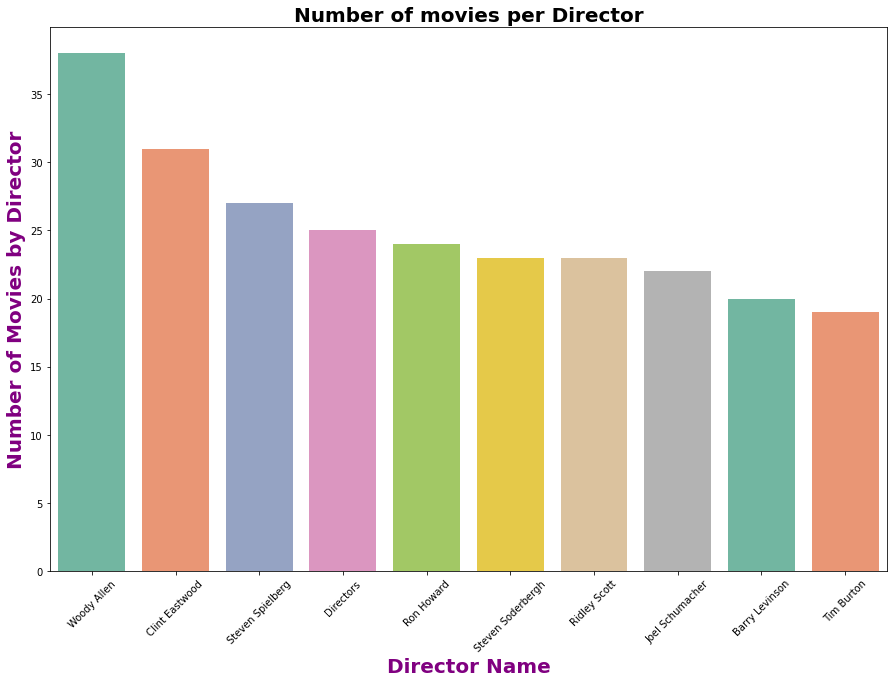

In [36]:
#number of movies per director and we will display only top 10 because we have 2063 unique director

plt.figure(figsize=[15, 10])#figure size
num_movie_per_director=movie['director'].value_counts().sort_values(ascending=False).reset_index()#counting number of movies per director
num_movie_per_director=num_movie_per_director.head(10)#only top10 
sns.barplot( x=num_movie_per_director.index, y=num_movie_per_director['director'] , palette='Set2')#choosing the axis
plt.xticks(list(range(10)), num_movie_per_director['index'], rotation = 45)#naming the xlabel with dircetors names
plt.title('Number of movies per Director', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Director Name', fontsize = 20,weight='bold', color='purple')#x label title
plt.ylabel('Number of Movies by Director', fontsize = 20, weight='bold', color='purple')#Y label title

Text(0, 0.5, 'Sum of profits(Billions)')

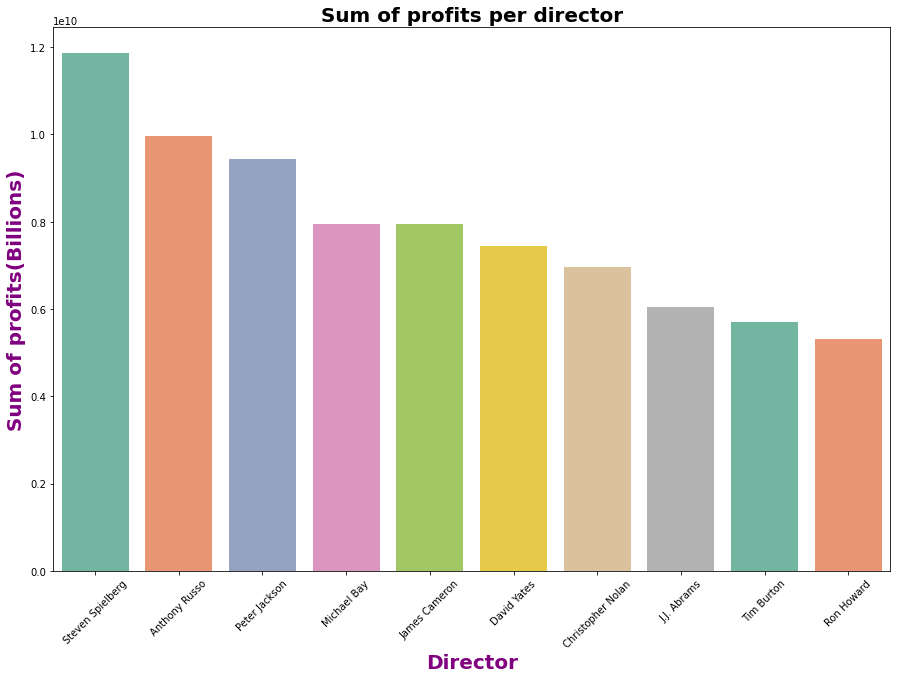

In [37]:
#sum of profites per director

plt.figure(figsize=[15, 10])#figure size
sum_profit_per_director=movie.groupby('director').profits.sum().sort_values(ascending=False).head(10).reset_index()#sum of profits
sns.barplot( x=sum_profit_per_director['director'], y=sum_profit_per_star['profits'], palette='Set2')#choosing asix
plt.xticks( rotation = 45)
plt.title('Sum of profits per director', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Director', fontsize = 20,weight='bold', color='purple')#X label title
plt.ylabel('Sum of profits(Billions)', fontsize = 20, weight='bold', color='purple')# Ylabel title

From the plots, we conclude that stars and directors with more movies are not the most profitable thus the assumption is wrong.

Now for the forth assumption:
4-Marvel production company is the most profitable.

In [38]:
movie['prod_company'].nunique()# Finding how many production company we have in the dataset

2239

Text(0, 0.5, 'Number of Movies byproduction company')

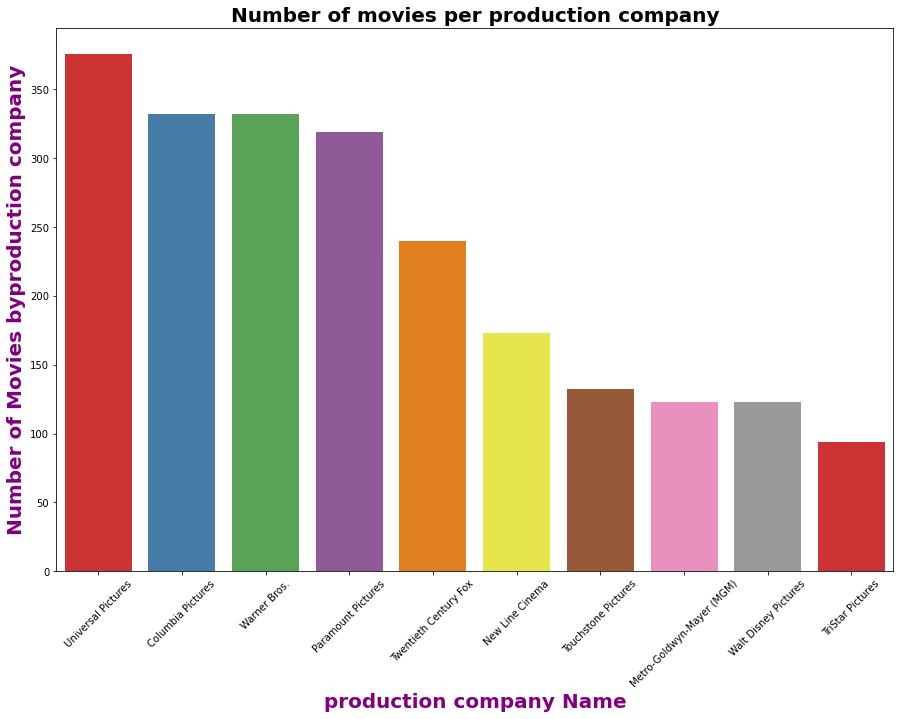

In [39]:
#number of movies per production company and we will only display top10 because we have 1475 different company

plt.figure(figsize=[15, 10])#figure size
num_movie_per_prod_company=movie['prod_company'].value_counts().sort_values(ascending=False).reset_index()#number of movies per company
num_movie_per_prod_company=num_movie_per_prod_company.head(10)#choosing top10
sns.barplot( x=num_movie_per_prod_company.index, y=num_movie_per_prod_company['prod_company'] , palette='Set1')#choosing the axis
plt.xticks(list(range(10)), num_movie_per_prod_company['index'], rotation = 45)#xleabels are the companies names
plt.title('Number of movies per production company', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('production company Name', fontsize = 20,weight='bold', color='purple')#xlabel title
plt.ylabel('Number of Movies byproduction company', fontsize = 20, weight='bold', color='purple')#y label title

Text(0, 0.5, 'Sum of profits(Billions)')

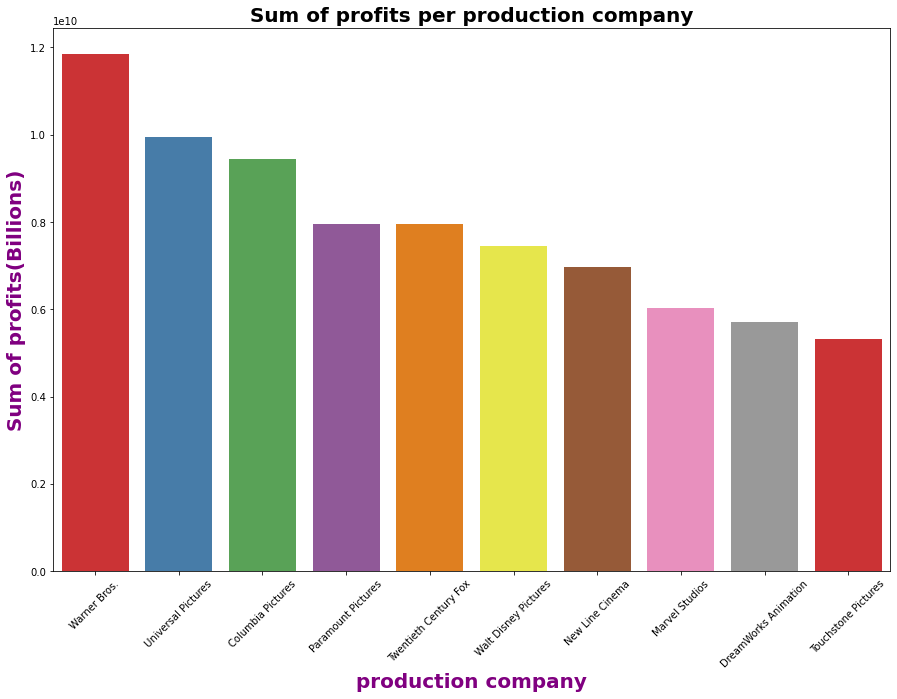

In [40]:
#sum of profits per company 

plt.figure(figsize=[15, 10])#figure size
sum_profit_per_prod_company=movie.groupby('prod_company').profits.sum().sort_values(ascending=False).head(10).reset_index()#sum of profits per company
sns.barplot( x=sum_profit_per_prod_company['prod_company'], y=sum_profit_per_star['profits'], palette='Set1')#choosing the axis
plt.xticks( rotation = 45)
plt.title('Sum of profits per production company', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('production company', fontsize = 20,weight='bold', color='purple')# Xlabel title
plt.ylabel('Sum of profits(Billions)', fontsize = 20, weight='bold', color='purple')#y label title

From the plot, we can see that Marvel production company is not the most profitable, thus our assumption is wrong.

Now for the fifth assumption:
5-Movies number and profits are increasing with time.

In [41]:
#count of movies per year
years=movie['releasing_date'].dt.year#spliting the year from the date
years=pd.DataFrame(years)#make it a dataframe
movie_num_per_year=movie.groupby(movie['releasing_date'].dt.year)['movie_name'].count()#count number of movies per year
movie_num_per_year=pd.DataFrame(movie_num_per_year)#make it a dataframe
movie_num_per_year

,movie_name
releasing_date,
1980,73
1981,91
1982,120
1983,127
1984,152
1985,168
1986,182
1987,180
1988,189


From the table, we can see that number of movies is increasing by the time, but in 2020 we see a dramatic decrease because of the coived19 restrictions that closed the cinema and we can assume that the profits in 2020 will be the lowest in the past 40 years.

Text(0, 0.5, 'Sum of profits(Billions)')

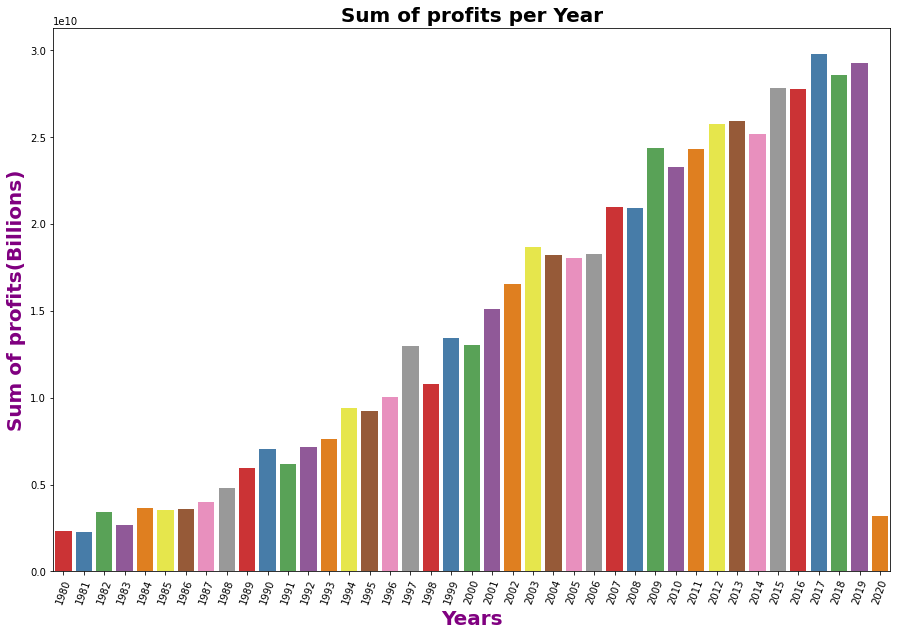

In [42]:
#sum of profits per year
years=movie['releasing_date'].dt.year#spliting the year from the data
years=pd.DataFrame(years)#make it a dataframe

profits=movie.groupby(movie['releasing_date'].dt.year)['profits'].agg('sum')#sum of the profits per year
profits=pd.DataFrame(profits)#make it a dataframe
years_profits=pd.merge(years,profits,on='releasing_date')#merge the two dataframes

plt.figure(figsize=[15, 10])#plot size
sns.barplot( x=years_profits['releasing_date'], y=years_profits['profits'], palette='Set1')#choosing axis
plt.xticks( rotation = 70)
plt.title('Sum of profits per Year', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Years', fontsize = 20,weight='bold', color='purple')#X label title
plt.ylabel('Sum of profits(Billions)', fontsize = 20, weight='bold', color='purple')#Y label title

We can say from the plot that the profits of the movies increasing over time. We can also notice that there are some years where the profits decreased a bit but increased in the next year. As for 2020, there are no profits as the past year and that is due to the covid19 pandemic.

Now for the final assumption:
6-Movies in December has the highest profits compared to other months.

In [43]:
#number of movies per month in the past 40 years
months=movie['releasing_date'].dt.month#spliting the month from the date
months=pd.DataFrame(months)#make it a dataframe
movie_num_per_month=movie.groupby(movie['releasing_date'].dt.month)['movie_name'].count()#count number of movies per month
movie_num_per_month=pd.DataFrame(movie_num_per_month)#make it a dataframe
movie_num_per_month
#movie_num_per_month.plot.pie(autopct="%.1f%%");
#lables=['1','2','3','4','5','6','7','8','9','10','11','12']
#plot.pie(movie_num_per_month,labels=lables)
#fig1, ax1 = plt.subplots()
#ax1.pie(movie_num_per_month['movie_name'], labels=lables, autopct='%1.1f%%', shadow=True)
#ax1.axis('equal')
#plt.show()


,movie_name
releasing_date,
1,584
2,584
3,666
4,626
5,558
6,547
7,570
8,716
9,634


From the table we can see that Novamber is the most month with movies

Text(0, 0.5, 'Sum of profits(Billions)')

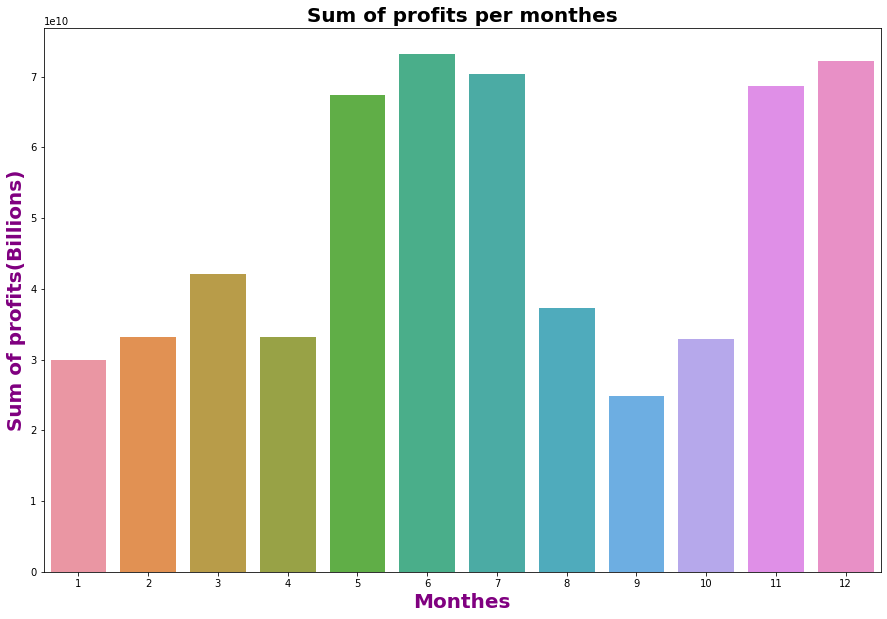

In [44]:
#sum of profits per month 
months=movie['releasing_date'].dt.month#spliting month from date
months=pd.DataFrame(months)#make it dataframe
profits=movie.groupby(movie['releasing_date'].dt.month)['profits'].agg('sum')#sum of profits per month
profits=pd.DataFrame(profits)#manke it a dataframe
month_profits=pd.merge(months,profits,on='releasing_date')#merge the two dataframe
plt.figure(figsize=[15, 10])#figure size
sns.barplot( x=month_profits['releasing_date'], y=month_profits['profits'])#choosing axis
sns.color_palette("hls", 8)#colors of the plot
plt.title('Sum of profits per monthes', fontsize = 20,weight='bold', color='black')#plot title
plt.xlabel('Monthes', fontsize = 20,weight='bold', color='purple')# x label title
plt.ylabel('Sum of profits(Billions)', fontsize = 20, weight='bold', color='purple')# Y label title

From the plot, we can see that December is not the most profitable month. The most interesting thing about this result is that June is the most profitable month although it is the second month with less movies. 

# #Machin Learning

In this part, I will create a model that predicts the profits of a movie to help the production companies determine if the movie will be a success or not. I will use Linear Regression and Random Forst Regressor as the models.

1-I will find the correlations between the features and the target feature.

2-I will select the more correlated feature to be used in the model

3-I will fit the Linear Regression Model

4-I will fit the Random Forst Regressor

In [45]:
movie.head()

,movie_name,rating,genre,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime,releasing_date,releasing_country
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


Change the type of the non-numerical data to numerical data to be used to indicate the correlation between the target and the other features.


In [46]:
movie1=movie.drop(['imdb_score','imdb_votes'], axis=1)#dropping the irrelevant columns
for i in movie1.columns:
    if(movie1[i].dtype == 'object'):
        movie1[i] = movie1[i].astype('category')
        movie1[i] = movie1[i].cat.codes# changing the data types of the non-numrical columns using cat code which reaplace the string with index of the data in the table
        
movie1.head()

,movie_name,rating,genre,director,writer,main_star,country,budget,profits,prod_company,runtime,releasing_date,releasing_country
0,6369,6,6,2469,3848,978,52,19000000,46998772,2176,146.0,1980-06-13,54
1,5370,6,1,2167,1562,305,53,4500000,58853106,686,104.0,1980-07-02,54
2,4953,4,0,1062,2462,1641,53,18000000,538375067,1443,124.0,1980-06-20,54
3,276,4,4,1247,1918,2110,53,3500000,83453539,1694,88.0,1980-07-02,54
4,991,6,4,1009,498,386,53,6000000,39846344,1662,98.0,1980-07-25,54


Text(0.5, 1.0, 'Movie1 Heat Map for the Features')

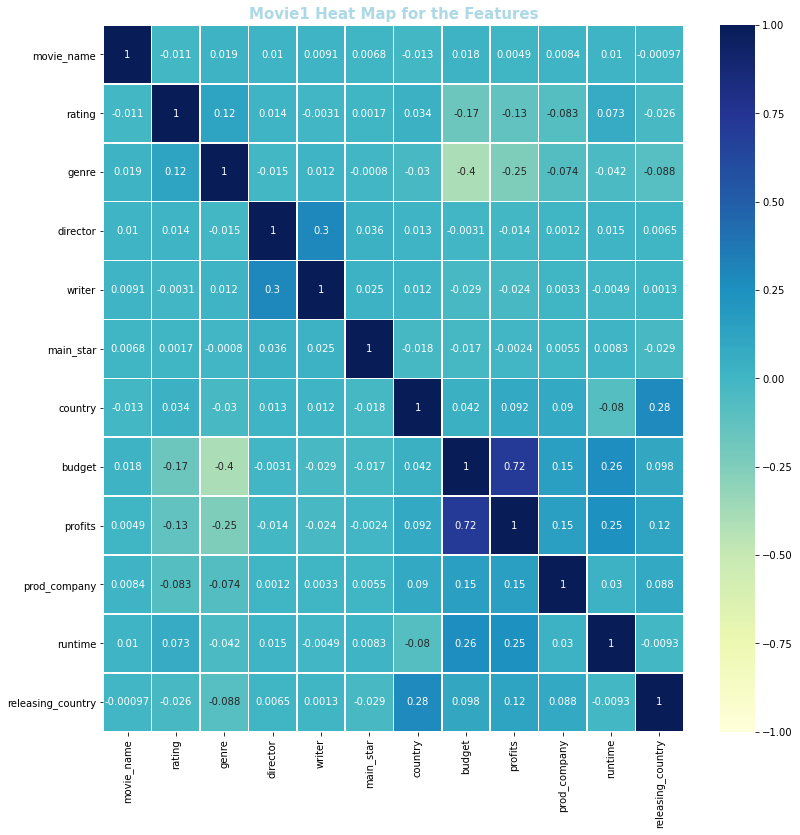

In [47]:
fig, ax = plt.subplots(figsize=(13,13))#figure size
correlation=movie1.corr()# crroelation map for the cokumns
sns.heatmap(correlation, annot=True, cmap="YlGnBu", vmin=-1, ax=ax, linewidths=.5)
plt.title('Movie1 Heat Map for the Features', size=15, weight= 'bold', color='lightblue')#plot title

Now we choose the highly correlated features.

In [48]:
target_corr = correlation["profits"]#our target feature
corr_featurs = target_corr[target_corr>=0.5]#feature condation
corr_featurs#we can see that the highly correlated feature is the budget

budget     0.717788
profits    1.000000
Name: profits, dtype: float64

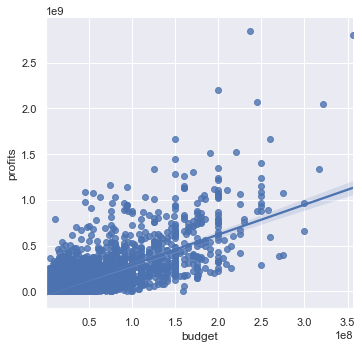

In [49]:
sns.set_theme()
sns.lmplot(x="budget", y="profits", data=movie1)#the plot shows the positive corrolation between the features

splitting the data to x and y(Target) and Training the model and gitting the R2

In [50]:
X=movie1['budget']#independent variable
Y=movie1['profits']#dependent variable(target)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.20)#splitting the data into 80 traning and 20 taste data

X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)


In [51]:
#Linear Regression Model
model_lr= LinearRegression()#creating the model
model_res=model_lr.fit(X_train,Y_train)#fitting the model on the traning data
r_sq = model_res.score(X_train, Y_train)#r squer value for traning data
r_sq

0.5157798603095123

we can see that the model is not a very good fit.
So I will try other model

In [52]:
model_res.coef_

array([[3.27801494]])

In [53]:
model_res.intercept_

array([-33253069.65597045])

In [54]:
r_sq = model_res.score(X_test, Y_test)#r squer value for test data
r_sq

0.5125289270345292

In [55]:
y_pred =model_res.predict(X_test)
y_pred

array([[ 5.40399544e+08],
       [ 4.86973037e+07],
       [-2.66970398e+07],
       ...,
       [-3.16140622e+07],
       [-4.72920296e+05],
       [ 3.27328573e+08]])

In [56]:
#Random Forest Regressor 
model_rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)#creating the model
model_res_2=model_rfr.fit(X_train,Y_train)#fitting the model on the traning data
r_sq_2=model_res_2.score(X_train, Y_train)#r square value
r_sq_2

<ipython-input-56-94c0a3c44511>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res_2=model_rfr.fit(X_train,Y_train)#fitting the model on the traning data


0.6725211177319232

we can see that the Random Forset Regressor has a better R square value than the Linear Regression Model SO it will be the model to be used.


In [57]:
r_sq_2 = model_res_2.score(X_test, Y_test)#r squer value for test data
r_sq_2

0.5516824893951084

In [58]:
y_pred =model_res_2.predict(X_test)
y_pred

array([4.98757041e+08, 5.79782722e+07, 9.96667294e+06, ...,
       1.06281706e+07, 2.69132000e+07, 3.36335498e+08])